# SparseEdges

## A bio-inspired sparse representation of edges in natural images


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


In [80]:
from __future__ import division, print_function
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of watermark failed: Traceback (most recent call last):
  File "/Users/lolo/.pyenv/versions/2.7.9/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named watermark
]


What is the SparseEdges package?
================================

Our goal here is to build practical algorithms of sparse coding for computer vision.

This class exploits the LogGabor package to provide with a sparse representation of edges in images.

This algorithm was presented in the following paper:

~~~~{.bibtex}
@inbook{Perrinet15bicv,
    author = {Perrinet, Laurent U.},
    booktitle = {Biologically-inspired Computer Vision},
    chapter = {13},
    citeulike-article-id = {13566753},
    editor = {Keil, Matthias and Crist\'{o}bal, Gabriel and Perrinet, Laurent U.},
    keywords = {anr-trax, bicv-sparse},
    posted-at = {2015-03-31 14:21:35},
    priority = {2},
    publisher = {Wiley, New-York},
    title = {Sparse models},
    year = {2015}
}
~~~~

This package gives a python implementation.

Moreover, it gives additional tools to compute useful stistics in images; first- and second order statistics of co-occurences in images.
More information is available @ http://nbviewer.ipython.org/github/meduz/SparseEdges/blob/master/SparseEdges.ipynb
Tests for the packages are available @ http://nbviewer.ipython.org/github/meduz/SparseEdges/blob/master/test-SparseEdges.ipynb.

## Installing

To install the ``SparseEdges`` class, you would need the ``LogGabor`` class (multiscale filters) which itself depends on the ``SLIP`` class (the image processing tools).

    pip install git+https://github.com/meduz/SLIP.git
    pip install git+https://github.com/meduz/LogGabor.git 
    pip install git+https://github.com/meduz/SparseEdges.git
    

But before, you need th usual depndencies, such as numpy, matplotlib, pyprind and imageio:

    pip install -U numpy matplotlib pyprind imageio


[Back to top](#SparseEdges)

In [81]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

### Extracting edges on a sample image

We will show here how we can simply reconstruct an example image with the list of extracted edges overlaid.

First we define our object by loading default parameters from internet:

In [82]:
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
print(mp.pe)

{'edge_mask': True, 'figsize_cohist': 3.41, 'verbose': 15, 'loglevel_max': 7, 'B_theta': 0.17453277777777776, 'do_mask': True, 'd_max': 2.0, 'n_theta': 24, 'dip_B_theta': 1.0, 'figsize_edges': 6, 'N_scale': 5, 'seed': None, 'base_levels': 1.618, 'line_width_chevrons': 0.75, 'scale_circle': 0.08, 'N_X': 256, 'do_rank': False, 'N_Y': 256, 'scale': 0.8, 'noise': 0.33, 'N_image': 100, 'datapath': 'https://raw.githubusercontent.com/meduz/SparseEdges/master/database/', 'N_r': 6, 'white_N': 0.07, 'edgematpath': 'mat/edges/', 'white_recompute': False, 'd_min': 0.25, 'white_n_learning': 0, 'MP_alpha': 0.7, 'edge_scale_chevrons': 180.0, 'B_sf': 0.4, 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_phi': 12, 'N_Dtheta': 24, 'white_N_0': 0.0, 'do_whitening': True, 'matpath': 'mat/', 'N': 2048, 'scale_invariant': True, 'kappa_phase': 0.0, 'dip_w': 0.2, 'd_width': 45.0, 'MP_rho': None, 'multiscale': True, 'weight_by_distance': True, 'line_width': 1.0, 'dip_epsilon': 0.5, 'white_f

At this point, we can change these parameters, by instance by using ``2048`` edges and a different value for the $\alpha$ value in matching pursuit:

In [83]:
mp.pe.N = 2048
mp.pe.MP_alpha = .9
print(mp.pe)

{'edge_mask': True, 'figsize_cohist': 3.41, 'verbose': 15, 'loglevel_max': 7, 'B_theta': 0.17453277777777776, 'do_mask': True, 'd_max': 2.0, 'n_theta': 24, 'dip_B_theta': 1.0, 'figsize_edges': 6, 'N_scale': 5, 'seed': None, 'base_levels': 1.618, 'line_width_chevrons': 0.75, 'scale_circle': 0.08, 'N_X': 256, 'do_rank': False, 'N_Y': 256, 'scale': 0.8, 'noise': 0.33, 'N_image': 100, 'datapath': 'https://raw.githubusercontent.com/meduz/SparseEdges/master/database/', 'N_r': 6, 'white_N': 0.07, 'edgematpath': 'mat/edges/', 'white_recompute': False, 'd_min': 0.25, 'white_n_learning': 0, 'MP_alpha': 0.9, 'edge_scale_chevrons': 180.0, 'B_sf': 0.4, 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_phi': 12, 'N_Dtheta': 24, 'white_N_0': 0.0, 'do_whitening': True, 'matpath': 'mat/', 'N': 2048, 'scale_invariant': True, 'kappa_phase': 0.0, 'dip_w': 0.2, 'd_width': 45.0, 'MP_rho': None, 'multiscale': True, 'weight_by_distance': True, 'line_width': 1.0, 'dip_epsilon': 0.5, 'white_f

We can now load an image and make sure to set the framework to the appropriate size:

In [84]:
# defining input image
name = 'lena'
image = mp.imread('https://raw.githubusercontent.com/meduz/SparseEdges/master/database/lena256.png')
mp.set_size(image)

... then, we can initialize the algorithm and normalize the image:

In [85]:
mp.init()
image = mp.normalize(image, center=True)
print(image.mean(), image.std())

-5.20417042793e-18 0.425372390439


Thenit is easy to run matching pursuit on that image (or load a cached file with the results):

In [86]:
print(os.path.join(mp.pe.matpath, name + '.npy'))

mat/lena.npy


In [87]:
try:
    edges = np.load(os.path.join(mp.pe.matpath, name + '.npy'))
except:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    

Let's show the results of the sparse edge extraction with the edges overlaid on the original image:

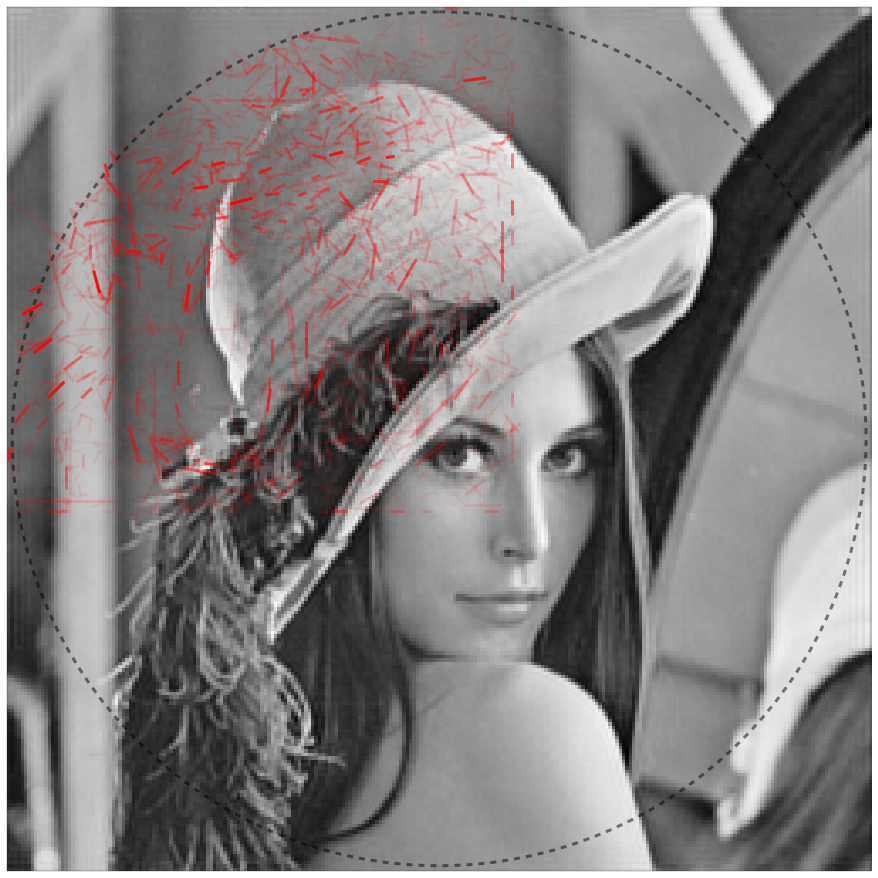

In [88]:
mp.pe.figsize_edges = 12
mp.pe.line_width = 3.
mp.pe.scale = .5

fig, a = mp.show_edges(edges, image=mp.dewhitening(mp.whitening(image)), show_phase=False, mask=True)

Note the dashed circle which (as in Geisler, 2001) shows the limit after which we discard edges. Indeed, when computing statistics (our main goal) we wish to be not perturbed by the fact that images are rectangular.

Let's show the results of the sparse edge extraction with the edges overlaid on the image reconstructed from the edges:

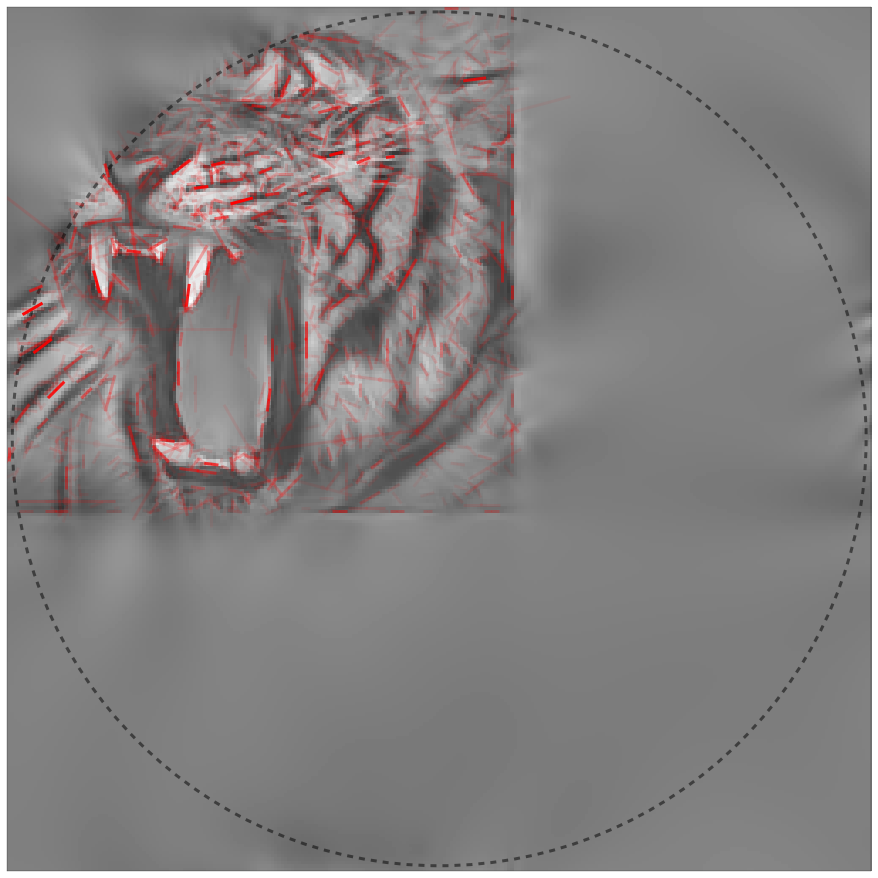

In [89]:
image_rec = mp.reconstruct(edges, mask=True)        
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec), show_phase=False, mask=True)

In [90]:
#! this test report is about the MatchingPursuit class:
print(SparseEdges.__doc__)

None


For a full tutorial on Matching Pursuit, see http://blog.invibe.net/posts/2015-05-22-a-hitchhiker-guide-to-matching-pursuit.html.

### Effect of parameters on edge extraction: image size



In [91]:
%%writefile test/experiment_fig-sparselets.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

$ python test/experiment_fig-sparselets.py ./figures

$ rm -fr **/SparseLets* **/**/SparseLets* 

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"
    
from SparseEdges import SparseEdges
FORMATS = ['pdf', 'eps']
mps = []
sizes = [16, 32, 64, 128, 256]
N_image = 32
N = 1024

for size, size_str in zip(sizes, ['_016', '_032', '_064',  '_128', '']):
    mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
    mp.pe.seed = 42
    mp.pe.datapath = '../../SLIP/database/'
    mp.set_size((size, size))
    downscale_factor = sizes[-1]/size # > 1
    mp.pe.N_image = int(N_image*downscale_factor)
    mp.pe.N = int(N/downscale_factor**2)
    mp.init()
    mp.process('SparseLets' + size_str)
    mps.append(mp)

import matplotlib.pyplot as plt
fig_width_pt = 600 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig = plt.figure(figsize=(fig_width, fig_width/1.618))

sizes = [16, 32, 64, 128, 256]
experiments = ['SparseLets_' + '%0.3d' % size for size in sizes]
experiments[-1] = 'SparseLets'
databases = ['serre07_distractors'] * len(experiments)
labels = [str(size) for size in sizes]
fig, ax, inset = mp.plot(fig=fig, mps=mps, experiments=experiments, databases=databases, 
                  labels=labels, scale=True)    
FORMATS = ['pdf', 'eps']
for ext in FORMATS: fig.savefig(mps[0].pe.figpath + 'SparseLets_B.' + ext)

Overwriting test/experiment_fig-sparselets.py


INFO:SLIP: > computing edges for experiment SparseLets_016 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment SparseLets_016 RMSE = 0.462190 
INFO:SLIP: > computing edges for experiment SparseLets_032 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment SparseLets_032 RMSE = 0.254423 
INFO:SLIP: > computing edges for experiment SparseLets_064 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment SparseLets_064 RMSE = 0.191460 
INFO:SLIP: > computing edges for experiment SparseLets_128 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment SparseLets_128 RMSE = 0.171504 
INFO:SLIP: > computing edges for experiment SparseLets with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment SparseLets RMSE = 0.065447 
INFO:SLIP: > computing edges for experiment SparseLets_016 with

/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges/test
/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges


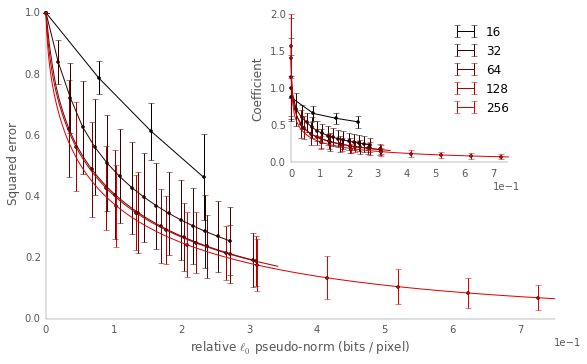

In [92]:
%cd test
%run experiment_fig-sparselets.py
%cd ..

### Effect of parameters on edge extraction: filter parameters



In [93]:
%%writefile test/experiment_fig-efficiency.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

$ ipython experiment_fig-efficiency.py

rm -fr **/efficiency_* **/**/efficiency_* 

"""
import numpy as np
from SparseEdges import SparseEdges
FORMATS = ['pdf', 'eps']

threshold = None # classical plots
threshold = .1 # plot L0 sparseness obtained when reaching this threshold
 
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
def init_mp():
    mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
    mp.pe.seed = 42
    mp.pe.N_image = 60
    mp.pe.datapath = '../../SLIP/database/'
    return mp

    
FORMATS = ['pdf', 'eps']
#FORMATS = ['png']
import matplotlib
matplotlib.use('Agg') 
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'text.usetex': False})

import matplotlib.pyplot as plt
fig_width_pt = 800 #318.67085 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

# ==================================================================================================#
fig, [[A, B], [C, D]] = plt.subplots(2, 2, figsize=(fig_width, fig_width), subplot_kw={'axisbg':'w'})
# ==================================================================================================#
mps, experiments = [], []
v_B_sf = np.logspace(-.2, .2, 5, base=10, endpoint=True)*mp.pe.B_sf
for B_sf in v_B_sf:
    mp = init_mp()
    mp.pe.B_sf = B_sf
    exp = 'efficiency_B_sf_' + str(B_sf).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % B_sf for B_sf in v_B_sf]
try:
    fig, A, inset = mp.plot(mps=mps,
                      experiments=experiments, databases=databases, labels=labels, ref=2,
                      fig=fig, ax=A, color=[0., 1., 0.], threshold=threshold, scale=False)    
    A.set_xlabel(r'frequency bandwith $B_{sf}$')
    #A.set_yticks([0., 0.02, 0.04, 0.06])
except Exception as e:
    print('Failed to plot  with error : %s ' % e )

# ==================================================================================================#    
mps, experiments = [], []
v_B_theta = np.logspace(-.5, .5, 5, base=10, endpoint=True)*mp.pe.B_theta
for B_theta in v_B_theta:
    mp = init_mp()
    mp.pe.B_theta = B_theta
    exp = 'efficiency_B_theta_' + str(B_theta).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % B_theta for B_theta in v_B_theta]
try:
    fig, B, inset = mp.plot(mps=mps, 
                      experiments=experiments, databases=databases, labels=labels, ref=2, 
                      fig=fig, ax=B, threshold=threshold, scale=False, color=[0., 1., 0.])    
    B.set_xlabel(r'orientation bandwith $B_{\theta}$ (radians)')
    B.set_ylabel('')
    #B.set_yticks([0., 0.02, 0.04, 0.06])
    #B.set_yticklabels(['', '', '', ''])
except Exception as e:
    print('Failed to plot  with error : %s ' % e )

# ==================================================================================================#    
mps, experiments = [], []
v_n_theta = [6, 12, 24, 48]
for n_theta in v_n_theta:
    mp = init_mp()
    mp.pe.n_theta = n_theta
    mp = init_mp()
    exp = 'efficiency_n_theta_' + str(n_theta).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = [str(n_theta) for n_theta in v_n_theta]
try:
    fig, C, inset = mp.plot(mps=mps, 
                      experiments=experiments, databases=databases, labels=labels, ref=2, 
                      fig=fig, ax=C, threshold=threshold, scale=True, color=[0., 1., 0.])    
    C.set_xlabel(r'number of orientations $N_{\theta}$')
    #C.set_yticks([0., 0.02, 0.04, 0.06])
except Exception as e:
    print('Failed to plot  with error : %s ' % e )

# ==================================================================================================#    
mps, experiments = [], []
v_base_levels = [np.sqrt(2), np.sqrt(5)/2.+.5, np.sqrt(3), 2. , np.sqrt(5)]
#np.logspace(.25, 1.25, 5, base=2, endpoint=True)
for base_levels in v_base_levels:
    mp = init_mp()
    mp.pe.base_levels = base_levels
    mp = init_mp()
    exp = 'efficiency_base_levels_' + str(base_levels).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % (base_levels) for base_levels in v_base_levels]
labels[0] = r'$\sqrt{2}$'
labels[1] = r'$\phi$'
labels[3] = '2'
try:
    fig, D, inset = mp.plot(mps=mps, 
                      experiments=experiments, databases=databases, labels=labels, ref=3, 
                      fig=fig, ax=D, threshold=threshold, scale=True, color=[0., 1., 0.])    
    D.set_xlabel(r'scale ratio')
    D.set_ylabel('')
    D.set_yticks([0., 1., 1.3])
    D.set_yticklabels(['0', '1', ''])
except Exception as e:
    print('Failed to plot  with error : %s ' % e )

for ax, label in zip([A, B, C, D], ['A', 'B', 'C', 'D']):
    ax.text(-.1, .95, label, transform=ax.transAxes, fontsize=12) #'('+label+')'
    ax.set_ylim([0., 1.6])
    ax.set_yticks([0., 1., 1.4])
    ax.set_yticklabels(["0", '1', ''])
    if label in ['B', 'D']: ax.set_yticklabels(['', '', ''])


# TODO : show CRF
        
#The parameter meanings (and suggested defaults) are::
#
#  left  = 0.125  # the left side of the subplots of the figure
#  right = 0.9    # the right side of the subplots of the figure
#  bottom = 0.1   # the bottom of the subplots of the figure
#  top = 0.9      # the top of the subplots of the figure
#  wspace = 0.2   # the amount of width reserved for blank space between subplots
#  hspace = 0.2   # the amount of height reserved for white space between subplots
fig.subplots_adjust(wspace=0.12, hspace=0.3,
                            left=0.125, right=0.98,
                            top=0.98,    bottom=0.12)
    
for ext in FORMATS: fig.savefig(mp.pe.figpath + 'efficiency.' + ext)

Overwriting test/experiment_fig-efficiency.py


INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_252382937792 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_sf_0_252382937792 RMSE = 0.073473 
INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_31773129389 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_sf_0_31773129389 RMSE = 0.076804 
INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_4 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_sf_0_4 RMSE = 0.076317 
INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_503570164718 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_sf_0_503570164718 RMSE = 0.067744 
INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_633957276984 with database serre07_distractors 
INFO:SLIP:>>> For the class se

/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges/test
ref-thr - L0_ref=

INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_252382937792 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_sf_0_252382937792 RMSE = 0.073473 
INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_31773129389 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_sf_0_31773129389 RMSE = 0.076804 
INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_4 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_sf_0_4 RMSE = 0.076317 
INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_503570164718 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_sf_0_503570164718 RMSE = 0.067744 
INFO:SLIP: > computing edges for experiment efficiency_B_sf_0_633957276984 with database serre07_distractors 
INFO:SLIP:>>> For the class se

 [  1.0000e+00   1.0000e+00   1.5230e+03   1.9550e+03   1.5940e+03
   5.5000e+02   6.7700e+02   1.1830e+03   1.0000e+00   7.8500e+02
   1.1510e+03   2.0040e+03   1.0000e+00   1.0000e+00   5.1100e+02
   6.6600e+02   3.4100e+02   4.4000e+02   1.7940e+03   1.0000e+00]
ref-thr - relL0= [69.70215586867026, 0.71097569246947945, 0.6991100553246945, 65.994072569714234, 67.353887636638191]
ref-thr - L0_ref=

INFO:SLIP: > computing edges for experiment efficiency_B_theta_0_0551921104134 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_theta_0_0551921104134 RMSE = 0.096027 
INFO:SLIP: > computing edges for experiment efficiency_B_theta_0_0981469935447 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_theta_0_0981469935447 RMSE = 0.075638 
INFO:SLIP: > computing edges for experiment efficiency_B_theta_0_174532777778 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_theta_0_174532777778 RMSE = 0.067052 
INFO:SLIP: > computing edges for experiment efficiency_B_theta_0_310368045099 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_B_theta_0_310368045099 RMSE = 0.094787 
INFO:SLIP: > computing edges for experiment efficiency_B_theta_0_551921104134 with datab

 [  1.0000e+00   1.0000e+00   1.0000e+00   1.0000e+00   1.4520e+03
   4.8800e+02   6.1000e+02   1.0860e+03   1.0000e+00   7.0700e+02
   1.0270e+03   1.7910e+03   1.0000e+00   1.0000e+00   4.6500e+02
   6.0300e+02   3.2500e+02   3.9000e+02   1.6700e+03   1.2990e+03]
ref-thr - relL0= [0.78594373442417642, 0.72790661508703747, 0.64904684560875214, 0.74465229435672042, 0.77155858870680838]
ref-thr - L0_ref=

INFO:SLIP: > computing edges for experiment efficiency_n_theta_6 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_n_theta_6 RMSE = 0.063972 
INFO:SLIP: > computing edges for experiment efficiency_n_theta_12 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_n_theta_12 RMSE = 0.063972 
INFO:SLIP: > computing edges for experiment efficiency_n_theta_24 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_n_theta_24 RMSE = 0.076317 
INFO:SLIP: > computing edges for experiment efficiency_n_theta_48 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_n_theta_48 RMSE = 0.076317 
INFO:SLIP: > computing edges for experiment efficiency_base_levels_1_41421356237 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_

 [  3.6689e-04   3.6689e-04   5.5877e-01   7.1727e-01   5.8482e-01
   2.0179e-01   2.4838e-01   4.3403e-01   3.6689e-04   2.8801e-01
   4.2229e-01   7.3524e-01   3.6689e-04   3.6689e-04   1.8748e-01
   2.4435e-01   1.2511e-01   1.6143e-01   6.5820e-01   3.6689e-04]
ref-thr - relL0= [94.131243690751191, 94.131243690751191, 0.6991100553246945, 0.6991100553246945]
ref-thr - L0_ref=

INFO:SLIP: > computing edges for experiment efficiency_base_levels_1_41421356237 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_base_levels_1_41421356237 RMSE = 0.076317 
INFO:SLIP: > computing edges for experiment efficiency_base_levels_1_61803398875 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_base_levels_1_61803398875 RMSE = 0.076317 
INFO:SLIP: > computing edges for experiment efficiency_base_levels_1_73205080757 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_base_levels_1_73205080757 RMSE = 0.076317 
INFO:SLIP: > computing edges for experiment efficiency_base_levels_2_0 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment efficiency_base_levels_2_0 RMSE = 0.076317 
INFO:SLIP: > computing edges for experiment efficiency_base_levels_2_2360679775 with dat

 [  3.6689e-04   3.6689e-04   5.5877e-01   7.1727e-01   5.8482e-01
   2.0179e-01   2.4838e-01   4.3403e-01   3.6689e-04   2.8801e-01
   4.2229e-01   7.3524e-01   3.6689e-04   3.6689e-04   1.8748e-01
   2.4435e-01   1.2511e-01   1.6143e-01   6.5820e-01   3.6689e-04]
ref-thr - relL0= [0.6991100553246945, 0.6991100553246945, 0.6991100553246945, 0.6991100553246945, 0.6991100553246945]
/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges


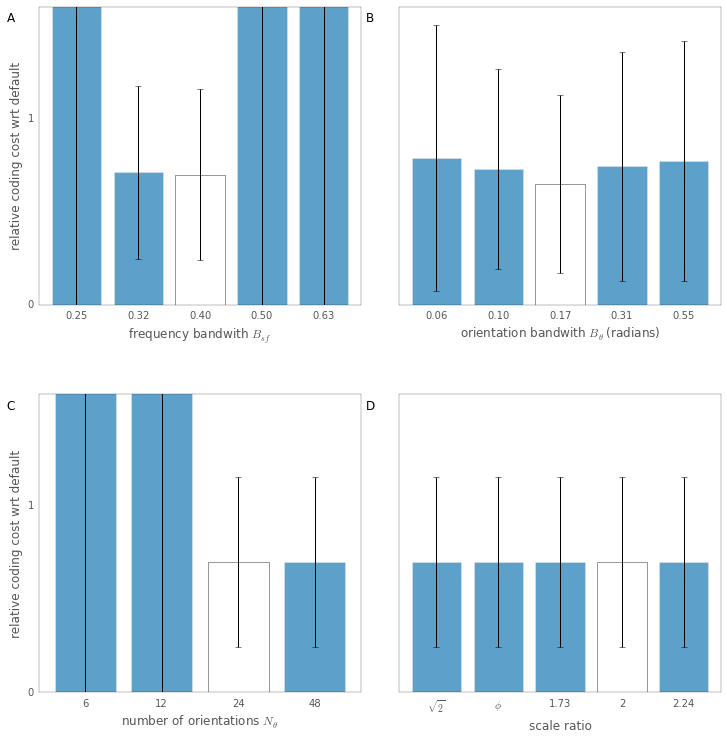

In [94]:
%cd test
%run experiment_fig-efficiency.py
%cd ..

As we test different parameters for the filters, we measured the gain in efficiency for the algorithm as the ratio of the code length to achieve $85\%$ of energy extraction relative to that for the default parameters (white bar). The average is computed on the same database of natural images and error bars denote the standard deviation of gain over the database. First, we studied the effect of the bandwidth of filters respectively in the $\textsf{(A)}$ spatial frequency and $\textsf{(B)}$ orientation spaces. The minimum is reached for the default parameters: this shows that default parameters provide an optimal compromise between the precision of filters in the frequency and position domains for this database. We may also compare pyramids with different number of filters.  Indeed, efficiency (in bits) is equal to the number of selected filters times the coding cost for the address of each edge in the pyramid.
We plot here the average gain in efficiency which shows an optimal compromise respectively for respectively $\textsf{(C)}$ the number of orientations and $\textsf{(D)}$ the number of spatial frequencies (scales). Note first that with more than 12 directions, the gain remains stable. Note also that a dyadic scale ratio (that is of 2) is efficient but that other solutions ---such as using the golden section $\phi$--- prove to be significantly more efficient, though the average gain is relatively small (inferior to $5\%$).

## some book keeping for the notebook

In [95]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

Installed watermark.py. To use it, type:
  %load_ext watermark
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
24/06/2015 12:43:39

CPython 2.7.9
IPython 3.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)
system     : Darwin
release    : 14.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [96]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

Installed version_information.py. To use it, type:
  %load_ext version_information
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


[autoreload of watermark failed: Traceback (most recent call last):
  File "/Users/lolo/.pyenv/versions/2.7.9/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named watermark
]


Software versions
Python 2.7.9 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 3.1.0
OS Darwin 14.3.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
sympy 0.7.6
Wed Jun 24 12:43:41 2015 CEST